In [1]:
import threecolorfigure
from threecolorfigure import rgbfig

In [2]:
from astropy import units as u, coordinates, visualization

In [3]:
import paths

In [4]:
cat /orange/adamginsburg/sgrb2/NB/00README.txt

NB.sgr_b2.M.B3.cont.pb0.1.r0.5.clean500k0.1mjy.pcal2.image.tt0.pbcor — Currently used M B3 (pcal3 version does not improve the image)
NB.sgr_b2.M.B3.cont.SMALL_PB.r0.5.clean100k0.1mjy.image.tt0.pbcor — Testing how far the image extends (pblim = 0.000…)
NB.sgr_b2.M.B6.cont.pb0.1.r0.5.clean100k2mjy_pcal2.image.tt0.pbcor — Currently used M B6
NB.sgr_b2.M.B6.cont.pb0.1.r0.5.clean500k2mjy_pcal3.image.tt0.pbcor — A close match to the currently used M B6; slightly higher noise (above) 
NB.sgr_b2.N.B3.cont.pb0.1.r0.5.clean500k0.1mjy.pcal2.image.tt0.pbcor — Currently used N B3 (pcal3 version does not improve the image)
NB.sgr_b2.N.B6.cont.pb0.1.r0.5.clean100k0.2mjy.image.tt0.pbcor — Old version of N B6, diagonal streaks
NB.sgr_b2.N.B6.cont.pb0.1.r0.5.clean100k2mjy_pcal3.image.tt0.pbcor — Old version of N B6, diagonal streaks
sgr_b2.M.B3.cont.7mmodel.r0.5.clean500k0.1mjy.cal_input.image.tt0.pbcor — 7m starting model
sgr_b2.M.B3.cont.7mmodel.r0.5.clean500k0.1mjy.mask.extra_cal.image.tt0.pbcor — 7

In [5]:
basepath = '/orange/adamginsburg/sgrb2'


In [14]:
((450*u.GHz).to(u.m, u.spectral()) / (12*u.m)).to(u.arcsec, u.dimensionless_angles())

<Quantity 11.45122838 arcsec>

In [17]:
import regions
Mb7 = regions.CircleSkyRegion(coordinates.SkyCoord('17:47:19.5923953111 -28:23:05.2739140498', frame='icrs', unit=(u.h, u.deg)), radius=10*u.arcsec)
Mb8 = regions.CircleSkyRegion(coordinates.SkyCoord('17:47:19.9221311412 -28:23:05.1613171346', frame='icrs', unit=(u.h, u.deg)), radius=6*u.arcsec)

In [19]:
Nb7 = regions.CircleSkyRegion(coordinates.SkyCoord('17:47:19.6006481743 -28:22:15.1530549570', frame='icrs', unit=(u.h, u.deg)), radius=10*u.arcsec)
Nb8 = regions.CircleSkyRegion(coordinates.SkyCoord('17:47:19.7394704410 -28:22:17.0019903362', frame='icrs', unit=(u.h, u.deg)), radius=6*u.arcsec)

In [7]:
18.8124*15/3600 + 47 * 15 /60 + 17*15

266.828385

In [8]:
import pylab as pl
from astropy import wcs
from astropy.io import fits

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


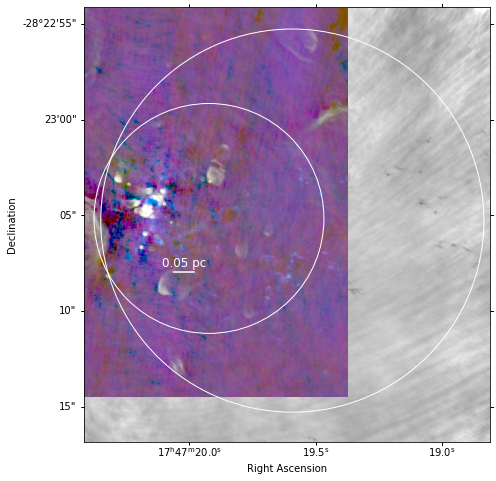

In [29]:
fig1 = pl.figure(1, figsize=(8,8))
fig1.clf()
celwcs = wcs.WCS(fits.getheader(f'{basepath}/NB/NB.sgr_b2.M.B6.cont.pb0.1.r0.5.clean100k2mjy_pcal2.image.tt0.pbcor.fits')).celestial

ax = fig1.add_subplot(1,1,1, projection=celwcs)
b6d = fits.getdata(f'{basepath}/NB/NB.sgr_b2.M.B6.cont.pb0.1.r0.5.clean100k2mjy_pcal2.image.tt0.pbcor.fits')
ax.imshow(b6d, cmap='gray_r', norm=visualization.simple_norm(b6d, stretch='asinh', max_percent=99.99, min_percent=1 ))

fig = rgbfig(figfilename='SgrB2M_RGB.pdf',
       #lims=[(266.8350734, 266.832958), (-28.38600555, -28.3832)],
       lims=[(266.8350734, 266.828385), (-28.38800555, -28.3817)],
       redfn=f'{basepath}/18A-229/FITS/SGRB2M-2012-Q-MEAN.DePree.recentered.fits',
       greenfn=f'{basepath}/NB/NB.sgr_b2.M.B3.cont.pb0.1.r0.5.clean500k0.1mjy.pcal2.image.tt0.pbcor.fits',
       bluefn=f'{basepath}/NB/NB.sgr_b2.M.B6.cont.pb0.1.r0.5.clean100k2mjy_pcal2.image.tt0.pbcor.fits',
       scalebarx=coordinates.SkyCoord(266.8336007*u.deg, -28.38553839*u.deg),
       stretch=visualization.LogStretch(),
             min_percent=0.5, max_percent=99.95,
       ax=ax,
      )
ax = fig.gca()
Mb7p = Mb7.to_pixel(ax.wcs)
Mb7p.plot(edgecolor='w')
Mb8p = Mb8.to_pixel(ax.wcs)
Mb8p.plot(edgecolor='w')
pl.savefig(paths.fpath('SgrB2M_rgb_pointings.png'), bbox_inches='tight')
pl.savefig(paths.fpath('SgrB2M_rgb_pointings.pdf'), bbox_inches='tight')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<WCSAxesSubplot:xlabel='Right Ascension', ylabel='Declination'>

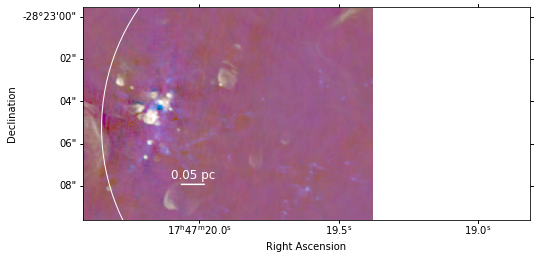

In [11]:
fig = rgbfig(figfilename='SgrB2M_RGB.pdf',
       #lims=[(266.8350734, 266.832958), (-28.38600555, -28.3832)],
       lims=[(266.8350734, 266.828385), (-28.38600555, -28.3832)],
       redfn=f'{basepath}/18A-229/FITS/SGRB2M-2012-Q-MEAN.DePree.recentered.fits',
       greenfn=f'{basepath}/NB/NB.sgr_b2.M.B3.cont.pb0.1.r0.5.clean500k0.1mjy.pcal2.image.tt0.pbcor.fits',
       bluefn=f'{basepath}/NB/NB.sgr_b2.M.B6.cont.pb0.1.r0.5.clean100k2mjy_pcal2.image.tt0.pbcor.fits',
       scalebarx=coordinates.SkyCoord(266.8336007*u.deg, -28.38553839*u.deg),
       stretch=visualization.LogStretch(),
      )
ax = fig.gca()
Mb7p = Mb7.to_pixel(ax.wcs)
Mb7p.plot(edgecolor='w')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


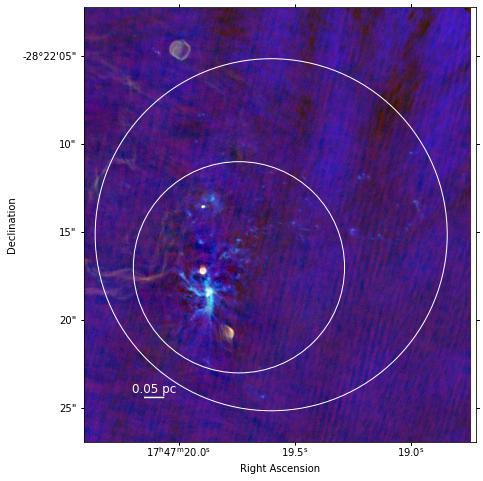

In [28]:
fig = rgbfig(figfilename="SgrB2N_RGB.pdf",
       lims=[([266.83504223,  266.8280]), ([-28.374138, -28.3672755])],
       scalebarx=coordinates.SkyCoord(266.833945*u.deg, -28.37343819*u.deg),
       redfn=f'{basepath}/18A-229/FITS/SGRB2N-2012-Q.DePree.recentered.fits',
       greenfn=f'{basepath}/NB/NB.sgr_b2.N.B3.cont.pb0.1.r0.5.clean500k0.1mjy.pcal2.image.tt0.pbcor.fits',
       bluefn=f'{basepath}/NB/sgr_b2.N.B6.cont.r0.5.500k0.1mjy.cal3.image.tt0.pbcor.fits')
ax = fig.gca()
Nb7p = Nb7.to_pixel(ax.wcs)
Nb7p.plot(edgecolor='w')
Nb8p = Nb8.to_pixel(ax.wcs)
Nb8p.plot(edgecolor='w')
pl.savefig(paths.fpath('SgrB2N_rgb_pointings.png'), bbox_inches='tight')
pl.savefig(paths.fpath('SgrB2N_rgb_pointings.pdf'), bbox_inches='tight')

In [36]:
from astropy.wcs import WCS
import copy
from astropy.visualization import simple_norm

In [40]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes

In [43]:
from mpl_toolkits.axes_grid1.inset_locator import TransformedBbox, BboxPatch, BboxConnector
from matplotlib.transforms import Bbox

def mark_inset_otherdata(axins, parent_ax, bl, tr, loc1, loc2, edgecolor='b'):
        blt = bl.transform_to(parent_ax.wcs.wcs.radesys.lower())
        trt = tr.transform_to(parent_ax.wcs.wcs.radesys.lower())
        (rx1,ry1),(rx2,ry2) = (parent_ax.wcs.wcs_world2pix([[blt.ra.deg,
                                                             blt.dec.deg]],0)[0],
                               parent_ax.wcs.wcs_world2pix([[trt.ra.deg,
                                                             trt.dec.deg]],0)[0]
                              )
        bbox = Bbox(np.array([(rx1,ry1),(rx2,ry2)]))
        rect = TransformedBbox(bbox, parent_ax.transData)

        markinkwargs = dict(fc='none', ec=edgecolor)

        pp = BboxPatch(rect, fill=False, **markinkwargs)
        parent_ax.add_patch(pp)

        p1 = BboxConnector(axins.bbox, rect, loc1=loc1, **markinkwargs)
        axins.add_patch(p1)
        p1.set_clip_on(False)
        p2 = BboxConnector(axins.bbox, rect, loc1=loc2, **markinkwargs)
        axins.add_patch(p2)
        p2.set_clip_on(False)
        
        return bbox, rect

In [44]:
from astropy import units as u
from astropy import coordinates
from astropy.stats import mad_std
from astropy.visualization import simple_norm
import astropy.visualization
import copy
from mpl_toolkits.axes_grid1 import make_axes_locatable
import radio_beam


def make_scalebar(ax, left_side, length, color='w', linestyle='-', label='',
                  fontsize=12, text_offset=0.1*u.arcsec):
    axlims = ax.axis()
    lines = ax.plot(u.Quantity([left_side.ra, left_side.ra-length]),
                    u.Quantity([left_side.dec]*2),
                    color=color, linestyle=linestyle, marker=None,
                    transform=ax.get_transform('fk5'),
                   )
    txt = ax.text((left_side.ra-length/2).to(u.deg).value,
                  (left_side.dec+text_offset).to(u.deg).value,
                  label,
                  verticalalignment='bottom',
                  horizontalalignment='center',
                  transform=ax.get_transform('fk5'),
                  color=color,
                  fontsize=fontsize,
                 )
    ax.axis(axlims)
    return lines,txt



def make_zoom(filename, zoom_parameters,
              overview_vis_pars={'max_percent':99.5, 'min_percent':0.5, 'stretch':'linear'},
              overview_cmap='gray_r',
              inset_cmap='inferno',
              main_zoombox=None,
              scalebar_loc=(0.1,0.1),
              scalebar_length=0.1*u.pc,
              beam_loc=(0.05, 0.05),
              nsigma_asinh=5,
              nsigma_max=10,
              nticks_inset=7,
              fontsize=20,
              tick_fontsize=16,
              distance=8.5*u.kpc
             ):

    fh = fits.open(filename)
    img = fh[0].data
    ww = WCS(fh[0].header)
    
    # cut out the minimal region that has data in it
    lbx,lby = np.argmax(np.any(notnan, axis=0)), np.argmax(np.any(notnan, axis=1))
    rtx,rty = notnan.shape[1] - np.argmax(np.any(notnan[::-1,::-1], axis=0)), notnan.shape[0] - np.argmax(np.any(notnan[::-1,::-1], axis=1))
    
    img = img[lby:rty, lbx:rtx]
    ww = ww[lby:rty, lbx:rtx]
    
    radesys = ww.wcs.radesys.upper()

    fig = pl.figure(1, figsize=(10,10))
    fig.clf()
    ax = fig.add_subplot(projection=ww.celestial)

    norm = simple_norm(img, **overview_vis_pars)

    img[img==0] = np.nan
    mad = mad_std(img, ignore_nan=True)

    if hasattr(norm.stretch, 'a') and nsigma_asinh is not None:
        norm.vmax = (np.nanmedian(img) + nsigma_max*mad)
        a_point = (np.nanmedian(img) + nsigma_asinh*mad) / norm.vmax
        norm.stretch.a = a_point
        print(f"numbers for norm: {np.nanmedian(img), nsigma_asinh, mad, nsigma_asinh*mad, norm.vmax, a_point}")

    im = ax.imshow(img, cmap=overview_cmap, norm=norm)

    ra = ax.coords['ra']
    ra.set_major_formatter('hh:mm:ss.s')
    dec = ax.coords['dec']
    ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
    dec.set_axislabel(f"Dec ({radesys})", fontsize=fontsize, minpad=0.0)
    ra.ticklabels.set_fontsize(tick_fontsize)
    ra.set_ticks(exclude_overlapping=True)
    dec.ticklabels.set_fontsize(tick_fontsize)
    dec.set_ticks(exclude_overlapping=True)


    for zp in zoom_parameters:

        xl,xr = zp['xl'], zp['xr']
        yl,yu = zp['yl'], zp['yu']
        slc = [slice(yl,yu), slice(xl,xr)]
        axins = inset_axes(ax, **zp['inset_pars'],
                           axes_class=astropy.visualization.wcsaxes.core.WCSAxes,
                           axes_kwargs=dict(wcs=ww.celestial))

        norm2 = simple_norm(img, **zp['vis_pars'])

        inset_cm = copy.copy(pl.cm.get_cmap(inset_cmap))
        inset_cm.set_bad(inset_cm(0))

        im_ins = axins.imshow(img[slc], extent=[xl,xr,yl,yu], cmap=inset_cm, norm=norm2)
        mark_inset(parent_axes=ax, inset_axes=axins,
                   fc="none", ec="b", **zp['mark_inset_pars'])
        ra = axins.coords['ra']
        dec = axins.coords['dec']
        axins.set_xticklabels([])
        axins.set_yticklabels([])
        axins.xaxis.set_visible(False)
        axins.yaxis.set_visible(False)
        ra.set_ticks_visible(False)
        dec.set_ticks_visible(False)
        ra.set_axislabel('')
        dec.set_axislabel('')
        ra.ticklabels.set_visible(False)
        dec.ticklabels.set_visible(False)

        caxins = inset_axes(axins,
                 width="5%", # width = 10% of parent_bbox width
                 height="100%", # height : 50%
                 loc='lower left',
                 bbox_to_anchor=(1.05, 0., 1, 1),
                 bbox_transform=axins.transAxes,
                 borderpad=0,
                 )

        cbins = pl.colorbar(mappable=im_ins, cax=caxins)
        cbins.ax.tick_params(labelsize=tick_fontsize)
        cbins.set_label(f"S$_\\nu$ [Jy beam$^{-1}$]", fontsize=fontsize)

        if 'tick_locs' in zp:
            cbins.set_ticks(zp['tick_locs'])
            if 'tick_labels' in zp:
                cbins.set_ticklabels(zp['tick_labels'])
        elif 'asinh' in str(norm2.stretch).lower():
            rounded_loc, rounded = determine_asinh_ticklocs(norm2.vmin, norm2.vmax, nticks=nticks_inset)
            cbins.set_ticks(rounded_loc)
            cbins.set_ticklabels(rounded)
        elif'log' in str(norm2.stretch).lower():
            if norm2.vmin > 0:
                rounded_loc, rounded = determine_asinh_ticklocs(norm2.vmin, norm2.vmax, nticks=nticks_inset, rms=mad, stretch='log')
                cbins.set_ticks(rounded_loc)
                cbins.set_ticklabels(rounded)
            else:
                ticks = cbins.get_ticks()
                newticks = [norm2.vmin] + list(ticks)
                newticks = [norm2.vmin, 0,] + list(np.geomspace(mad, norm2.vmax, 4))
                print(f"ticks={ticks}, newticks={newticks}, mad={mad}, vmin={norm2.vmin}")
                cbins.set_ticks(newticks)

    if main_zoombox:
        ax.axis(main_zoombox)

    divider = make_axes_locatable(ax)
    cax1 = fig.add_axes([ax.get_position().x1+0.01,
                         ax.get_position().y0,
                         0.02,
                         ax.get_position().height])
    cb1 = pl.colorbar(mappable=im, cax=cax1)
    cb1.ax.tick_params(labelsize=tick_fontsize)
    cb1.set_label(f"S$_\\nu$ [Jy beam$^{-1}$]", fontsize=fontsize)
    pl.setp(cb1.ax.yaxis.get_label(), backgroundcolor="white")

    left_side = coordinates.SkyCoord(*ww.celestial.wcs_pix2world(scalebar_loc[1]*img.shape[1],
                                                                        scalebar_loc[0]*img.shape[0], 0)*u.deg, frame='fk5')
    length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
    make_scalebar(ax, left_side, length, color='k', linestyle='-', label=f'{scalebar_length:0.1f}',
                  text_offset=0.5*u.arcsec, fontsize=fontsize)

    beam = radio_beam.Beam.from_fits_header(fh[0].header)
    ell = beam.ellipse_to_plot(beam_loc[1]*img.shape[1], beam_loc[0]*img.shape[0], pixscale=ww.celestial.pixel_scale_matrix[1,1]*u.deg)
    ax.add_patch(ell)

In [48]:
def hide_ticks(ax):
    ra = ax.coords['ra']
    dec = ax.coords['dec']
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ra.set_ticks_visible(False)
    dec.set_ticks_visible(False)
    ra.set_axislabel('')
    dec.set_axislabel('')
    ra.ticklabels.set_visible(False)
    dec.ticklabels.set_visible(False)

In [49]:
import numpy as np

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


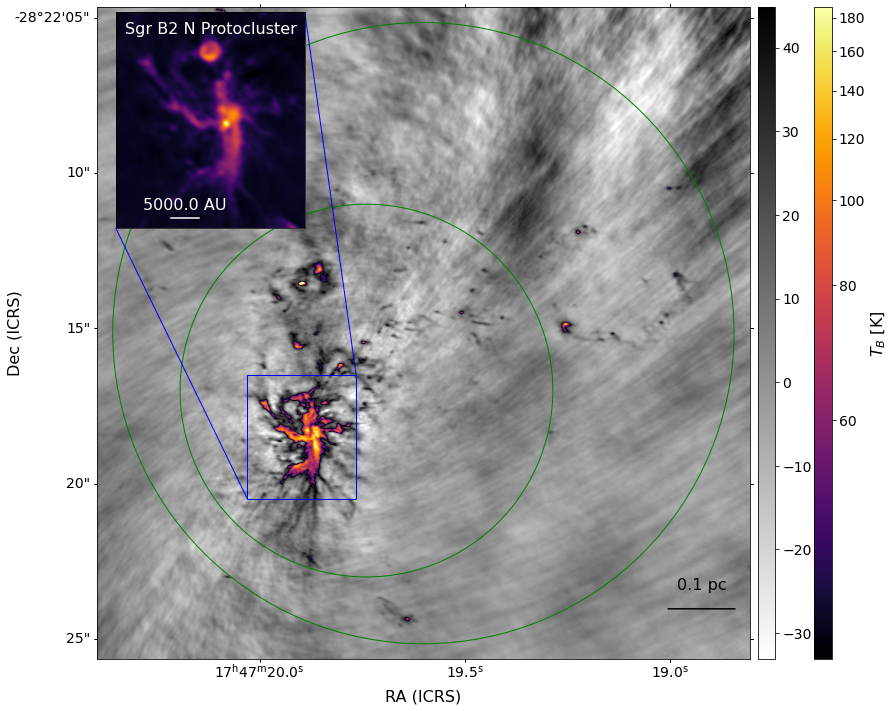

In [90]:
tick_fontsize = 14
fontsize = 16

fh = fits.open(f'{basepath}/NB/sgr_b2.N.B6.cont.r0.5.500k0.1mjy.cal3.image.tt0.pbcor.fits')
ww = wcs.WCS(fh[0].header)

jtok = radio_beam.Beam.from_fits_header(fh[0].header).jtok(220*u.GHz)


fh2 = fits.open('/orange/adamginsburg/sgrb2/NB/NB.sgr_b2.N.B3.cont.pb0.1.r0.5.clean500k0.1mjy.pcal2.image.tt0.pbcor.fits')
im2 = fh2[0].data.squeeze() # get rid of non-celestial axes
ww2 = WCS(fh2[0].header).celestial

imdata = fh[0].data * jtok.value

fig = pl.figure(figsize=(12,12))
ax = fig.add_subplot(projection=ww)
norm = visualization.simple_norm(imdata, stretch='linear', max_percent=99.5, min_percent=1)
im = ax.imshow(imdata, cmap='gray_r',
               norm=norm)


cm = copy.copy(pl.cm.get_cmap('inferno'))
cm.set_under((0,0,0,0))

vmin = norm.vmax*0.9
norm2 = simple_norm(imdata, min_cut=vmin, stretch='asinh', max_percent=99.9995)
norm2.vmin = vmin

im2_ = ax.imshow(imdata, norm=norm2, cmap=cm)


#ax.axis([167,1617,210,1618])

radesys = ww.wcs.radesys
_ = ax.set_xlabel(f"Right Ascension {radesys}")
_ = ax.set_ylabel(f"Declination {radesys}")

distance = 8.5*u.kpc
img = imdata.squeeze()
scalebar_length = 0.1*u.pc
scalebar_loc=(0.38,0.77) # y, x
left_side = coordinates.SkyCoord(*ww.celestial.wcs_pix2world(scalebar_loc[1]*img.shape[1],
                                                             scalebar_loc[0]*img.shape[0], 0)*u.deg,
                                 frame=radesys.lower())

length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
make_scalebar(ax, left_side, length, color='k', linestyle='-', label=f'{scalebar_length:0.1f}',
              text_offset=0.5*u.arcsec, fontsize=fontsize)


ra = ax.coords['ra']
ra.set_major_formatter('hh:mm:ss.s')
dec = ax.coords['dec']
ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
dec.set_axislabel(f"Dec ({radesys})", fontsize=fontsize, minpad=0.0)
ra.ticklabels.set_fontsize(tick_fontsize)
ra.set_ticklabel(exclude_overlapping=True)
dec.ticklabels.set_fontsize(tick_fontsize)
dec.set_ticklabel(exclude_overlapping=True)




# Sgr B2 N
axins2 = inset_axes(ax,
                   loc=2, width=3, height=3,
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                   axes_kwargs=dict(wcs=ww2))
xl,xr = 2675,2850
yl,yr = 2650,2850
bl = coordinates.SkyCoord(*ww2.wcs_pix2world(xl, yl, 0), frame=ww2.wcs.radesys.lower(), unit=(u.deg,u.deg))
tr = coordinates.SkyCoord(*ww2.wcs_pix2world(xr, yr, 0), frame=ww2.wcs.radesys.lower(), unit=(u.deg,u.deg))
axins2.imshow(im2[yl:yr,xl:xr], extent=[xl,xr,yl,yr], cmap='inferno',
              norm=simple_norm(im2[yl:yr,xl:xr], stretch='asinh')
             )
mark_inset_otherdata(axins2, ax, bl, tr, 1, 3,)
hide_ticks(axins2)


scalebar_length = 5000*u.au
length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
left_side = coordinates.SkyCoord(*ww2.wcs_pix2world(xl+50, yl+10, 0), frame=ww2.wcs.radesys.lower(), unit=(u.deg,u.deg))
make_scalebar(axins2, left_side, length, color='w', linestyle='-', label=f'{scalebar_length:0.1f}',
              text_offset=0.1*u.arcsec, fontsize=fontsize)
axins2.text(0.05, 0.9, 'Sgr B2 N Protocluster', transform=axins2.transAxes, color='w', fontsize=fontsize)




## Sgr B2 N low-mass
#axins3 = inset_axes(ax,
#                   loc=1, width=3, height=3,
#                   axes_class=visualization.wcsaxes.core.WCSAxes,
#                   axes_kwargs=dict(wcs=ww2))
#xl,xr = 2950,3450
#yl,yr = 2850,3225
#bl = coordinates.SkyCoord(*ww2.wcs_pix2world(xl, yl, 0), frame=ww2.wcs.radesys.lower(), unit=(u.deg,u.deg))
#tr = coordinates.SkyCoord(*ww2.wcs_pix2world(xr, yr, 0), frame=ww2.wcs.radesys.lower(), unit=(u.deg,u.deg))
#axins3.imshow(im2[yl:yr,xl:xr], extent=[xl,xr,yl,yr], cmap='inferno',
#              norm=simple_norm(im2[yl:yr,xl:xr], stretch='linear', max_percent=99.95, min_percent=0.1)
#             )
#mark_inset_otherdata(axins3, ax, bl, tr, 2, 4,)
#hide_ticks(axins3)
#
#
#scalebar_length = 0.1*u.pc
#length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
#left_side = coordinates.SkyCoord(*ww2.wcs_pix2world(xl+350, yl+10, 0), frame=ww2.wcs.radesys.lower(), unit=(u.deg,u.deg))
#make_scalebar(axins3, left_side, length, color='w', linestyle='-', label=f'{scalebar_length:0.1f}',
#              text_offset=0.1*u.arcsec, fontsize=fontsize)
#axins3.text(0.05, 0.9, 'Moderate-mass YSOs', transform=axins3.transAxes, color='w', fontsize=fontsize)


#ax.axis([266.83504223,  266.8280, -28.374138, -28.3672755], transform=ax.get_transform('world'))
Nb7p = Nb7.to_pixel(ax.wcs)
Nb7p.plot(edgecolor='g', ax=ax)
Nb8p = Nb8.to_pixel(ax.wcs)
Nb8p.plot(edgecolor='g', ax=ax)
ax.axis([Nb7p.center.x - Nb7p.radius*1.05, Nb7p.center.x + Nb7p.radius*1.05,
         Nb7p.center.y - Nb7p.radius*1.05, Nb7p.center.y + Nb7p.radius*1.05,])

pl.savefig(paths.fpath('SgrB2N_pointings_withzoom.png'), bbox_inches='tight')
pl.savefig(paths.fpath('SgrB2N_pointings_withzoom.pdf'), bbox_inches='tight')



divider = make_axes_locatable(ax)
cax = fig.add_axes([ax.get_position().x1+0.01,
                     ax.get_position().y0,
                     0.02,
                     ax.get_position().height])
cax2 = fig.add_axes([ax.get_position().x1+0.075,
                     ax.get_position().y0,
                     0.02,
                     ax.get_position().height])


cb = pl.colorbar(mappable=im, cax=cax)
#cb.set_label(f"$S_\\nu$ [{fh[0].header['BUNIT']}]", fontsize=fontsize)
#cb.set_ticks([np.nanmin(imdata), -0.01, 0.00, 0.01, 0.05, 0.10, 0.20, 0.30])
cb.ax.tick_params(labelsize=tick_fontsize)
cb2 = pl.colorbar(mappable=im2_, cax=cax2)
cb2.ax.tick_params(labelsize=tick_fontsize)
cb2.set_label("$T_B$ [K]", fontsize=tick_fontsize+2)

pl.savefig(paths.fpath('SgrB2N_pointings_withzoom_colorbar.png'), bbox_inches='tight')
pl.savefig(paths.fpath('SgrB2N_pointings_withzoom_colorbar.pdf'), bbox_inches='tight')


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


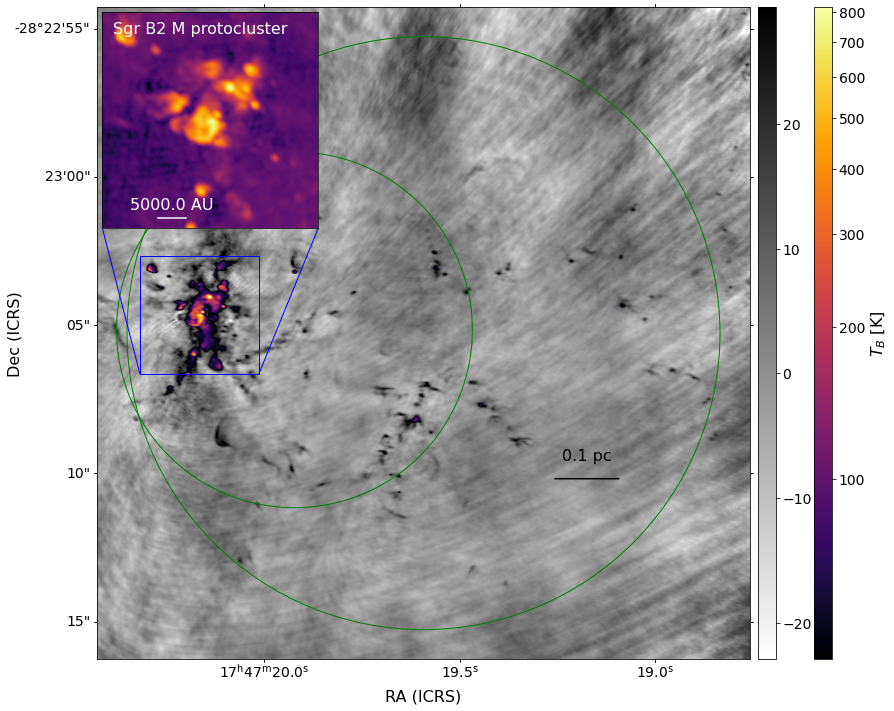

In [91]:
tick_fontsize = 14
fontsize = 16

fh = fits.open(f'{basepath}/NB/NB.sgr_b2.M.B6.cont.pb0.1.r0.5.clean100k2mjy_pcal2.image.tt0.pbcor.fits')

jtok = radio_beam.Beam.from_fits_header(fh[0].header).jtok(220*u.GHz)

ww = wcs.WCS(fh[0].header)

fh4 = fits.open('/orange/adamginsburg/sgrb2/NB/NB.sgr_b2.M.B3.cont.pb0.1.r0.5.clean500k0.1mjy.pcal2.image.tt0.pbcor.fits')
im4 = fh4[0].data.squeeze() # get rid of non-celestial axes
ww4 = WCS(fh4[0].header).celestial

fig = pl.figure(figsize=(12,12))
ax = fig.add_subplot(projection=ww)

imdata = fh[0].data * jtok

norm = visualization.simple_norm(imdata, stretch='linear', max_percent=99.5, min_percent=1)


im = ax.imshow(imdata, cmap='gray_r',
               norm=norm)


cm = copy.copy(pl.cm.get_cmap('inferno'))
cm.set_under((0,0,0,0))

vmin = norm.vmax*0.9
norm2 = simple_norm(imdata, min_cut=vmin, stretch='asinh', max_percent=99.9995)
norm2.vmin = vmin

im2 = ax.imshow(imdata, norm=norm2, cmap=cm)


#ax.axis([167,1617,210,1618])

radesys = ww.wcs.radesys
_ = ax.set_xlabel(f"Right Ascension {radesys}")
_ = ax.set_ylabel(f"Declination {radesys}")

distance = 8.5*u.kpc
img = imdata.squeeze()
scalebar_length = 0.1*u.pc
scalebar_loc=(0.38,0.77) # y, x
left_side = coordinates.SkyCoord(*ww.celestial.wcs_pix2world(scalebar_loc[1]*img.shape[1],
                                                             scalebar_loc[0]*img.shape[0], 0)*u.deg,
                                 frame=radesys.lower())

length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
make_scalebar(ax, left_side, length, color='k', linestyle='-', label=f'{scalebar_length:0.1f}',
              text_offset=0.5*u.arcsec, fontsize=fontsize)


ra = ax.coords['ra']
ra.set_major_formatter('hh:mm:ss.s')
dec = ax.coords['dec']
ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
dec.set_axislabel(f"Dec ({radesys})", fontsize=fontsize, minpad=0.0)
ra.ticklabels.set_fontsize(tick_fontsize)
ra.set_ticklabel(exclude_overlapping=True)
dec.ticklabels.set_fontsize(tick_fontsize)
dec.set_ticklabel(exclude_overlapping=True)





# Sgr B2 M
axins3 = inset_axes(ax,
                   loc=2, width=3, height=3,
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                   axes_kwargs=dict(wcs=ww4))
xl,xr = 2650,2850
yl,yr = 2650,2850
bl = coordinates.SkyCoord(*ww4.wcs_pix2world(xl, yl, 0), frame=ww4.wcs.radesys.lower(), unit=(u.deg,u.deg))
tr = coordinates.SkyCoord(*ww4.wcs_pix2world(xr, yr, 0), frame=ww4.wcs.radesys.lower(), unit=(u.deg,u.deg))
axins3.imshow(im4[yl:yr,xl:xr], extent=[xl,xr,yl,yr], cmap='inferno',
              norm=simple_norm(im4[yl:yr,xl:xr], stretch='log')              
             )
mark_inset_otherdata(axins3, ax, bl, tr, 3, 4,)
hide_ticks(axins3)
axins3.text(0.05, 0.9, 'Sgr B2 M protocluster', transform=axins3.transAxes, color='w', fontsize=fontsize)


scalebar_length = 5000*u.au
length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
left_side = coordinates.SkyCoord(*ww4.wcs_pix2world(xl+50, yl+10, 0), frame=ww4.wcs.radesys.lower(), unit=(u.deg,u.deg))
make_scalebar(axins3, left_side, length, color='w', linestyle='-', label=f'{scalebar_length:0.1f}',
              text_offset=0.1*u.arcsec, fontsize=fontsize)


#ax.axis([266.83504223,  266.8280, -28.374138, -28.3672755], transform=ax.get_transform('world'))
Mb7p = Mb7.to_pixel(ax.wcs)
Mb7p.plot(edgecolor='g', ax=ax)
Mb8p = Mb8.to_pixel(ax.wcs)
Mb8p.plot(edgecolor='g', ax=ax)
ax.axis([Mb7p.center.x - Mb7p.radius*1.1, Mb7p.center.x + Mb7p.radius*1.1,
         Mb7p.center.y - Mb7p.radius*1.1, Mb7p.center.y + Mb7p.radius*1.1,])

pl.savefig(paths.fpath('SgrB2M_pointings_withzoom.png'), bbox_inches='tight')
pl.savefig(paths.fpath('SgrB2M_pointings_withzoom.pdf'), bbox_inches='tight')


divider = make_axes_locatable(ax)
cax = fig.add_axes([ax.get_position().x1+0.01,
                     ax.get_position().y0,
                     0.02,
                     ax.get_position().height])
cax2 = fig.add_axes([ax.get_position().x1+0.075,
                     ax.get_position().y0,
                     0.02,
                     ax.get_position().height])


cb = pl.colorbar(mappable=im, cax=cax)
#cb.set_label(f"$S_\\nu$ [{fh[0].header['BUNIT']}]", fontsize=fontsize)
#cb.set_ticks([np.nanmin(imdata), -0.01, 0.00, 0.01, 0.05, 0.10, 0.20, 0.30])
cb.ax.tick_params(labelsize=tick_fontsize)
cb2 = pl.colorbar(mappable=im2, cax=cax2)
cb2.ax.tick_params(labelsize=tick_fontsize)
cb2.set_label("$T_B$ [K]", fontsize=tick_fontsize+2)

pl.savefig(paths.fpath('SgrB2M_pointings_withzoom_colorbar.png'), bbox_inches='tight')
pl.savefig(paths.fpath('SgrB2M_pointings_withzoom_colorbar.pdf'), bbox_inches='tight')


In [75]:
(850*u.um / (16*u.km)).to(u.arcsec, u.dimensionless_angles())

<Quantity 0.01095782 arcsec>